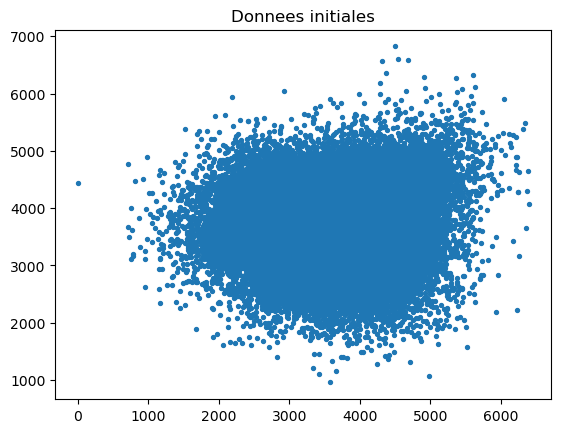

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn.cluster import KMeans

# Parser un fichier de donnees au format arff
# data est un tableau d ’ exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features ( dimension 2 )
# Ex : [[ - 0 . 499261 , -0 . 0612356 ] ,
# [ - 1 . 51369 , 0 . 265446 ] ,
# [ - 1 . 60321 , 0 . 362039 ] , .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster . On retire cette information
path = './dataset-rapport/y1.txt'
databrut = np.loadtxt(path)
datanp = [[x[0], x[1]] for x in databrut]
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]


# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [ - 0 . 499261 , -1 . 51369 , -1 . 60321 , ...]
# Ex pour f1 = [ - 0 . 0612356 , 0 . 265446 , 0 . 362039 , ...]
#f0 = [i[0] for i in datanp] # tous les elements de la premiere colonne
#f1 = [i[1] for i in datanp] # tous les elements de la deuxieme colonne
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()



## K-means

For n_clusters = 2 The average silhouette_score is : 0.3733908633841546  , runtime =  8443.27 ms 


KeyboardInterrupt: 

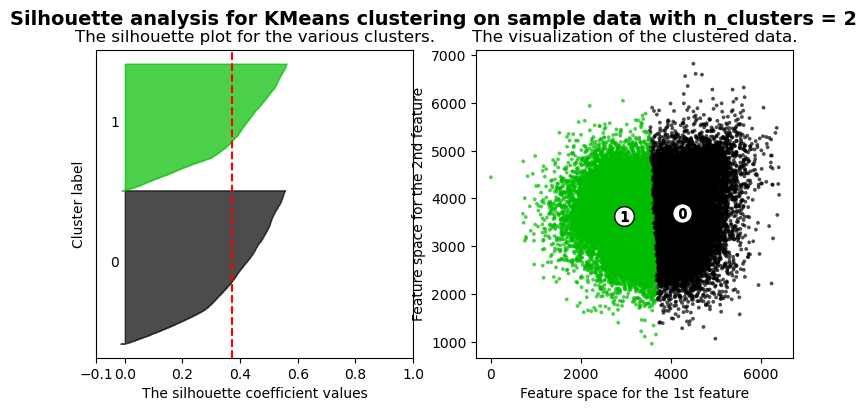

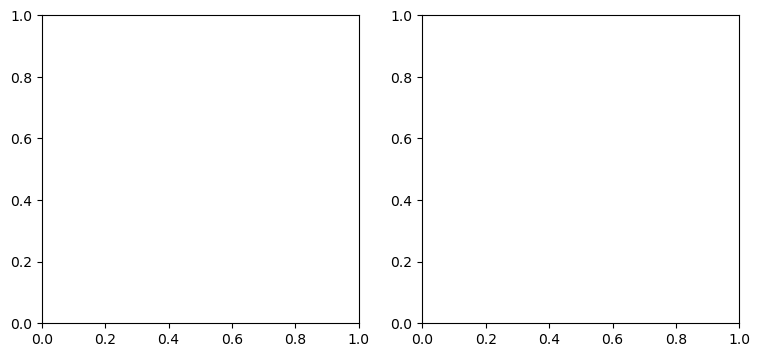

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import time
from sklearn.cluster import KMeans


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(9, 4)
    tps1 = time.time()
    clusterer = KMeans(n_clusters =n_clusters , init = 'k-means++')
    cluster_labels = clusterer.fit_predict(datanp)
    tps2 = time.time()
    silhouette_avg = silhouette_score(datanp, cluster_labels )
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        " , runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ,"ms " ,
    )
        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(datanp, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    f0 = [i[0] for i in datanp] # tous les elements de la premiere colonne
    f1 = [i[1] for i in datanp] # tous les elements de la deuxieme colon
    ax2.scatter(f0, f1, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

## Agglomerative


In [6]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster
# Donnees dans datanp
print ( "Dendrogramme 'complete' donnees initiales")
linked_mat = shc.linkage( datanp , 'average')
plt.figure ( figsize = ( 12 , 12 ) )
shc.dendrogram ( linked_mat ,
orientation = 'top',
distance_sort = 'descending' ,
show_leaf_counts = False )
plt.show ()
# set distance_threshold ( 0 ensures we compute the full tree )
#tps1 = time.time ()
#model = cluster.AgglomerativeClustering( distance_threshold = 1, linkage = 'complete' , n_clusters = None )
#model = model.fit( datanp )
#tps2 = time.time()
#labels = model.labels_
#k = model.n_clusters_
#leaves = model.n_leaves_
# Affichage clustering
#plt . scatter ( f0 , f1 , c = labels , s = 8 )
#plt . title ( " Resultat du clustering " )
#plt . show ()
#print ( " nb clusters = " ,k , " , nb feuilles = " , leaves , " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )

# set the number of clusters
k = 8
tps1 = time.time ()
model = cluster.AgglomerativeClustering( linkage = 'average' , n_clusters = k )
#model = cluster.AgglomerativeClustering( distance_threshold = 65, linkage = 'average' , n_clusters = None, compute_full_tree = True )
model = model.fit ( datanp )
tps2 = time.time ()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_
plt . scatter ( f0 , f1 , c = labels , s = 8 )
plt . title ( " Resultat du clustering " )
plt . show ()
print ( " nb clusters = " ,k , " , nb feuilles = " , leaves , " runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " )

Dendrogramme 'complete' donnees initiales


MemoryError: Unable to allocate 41.5 GiB for an array with shape (5575627200,) and data type float64

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import random
from itertools import combinations
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
# Distances k plus proches voisins
# Donnees dans X
k=5




tps1 = time.time ()
neigh = NearestNeighbors(n_neighbors = k)
neigh.fit(datanp)
distances,indices = neigh .kneighbors(datanp)
# retirer le point " origine "
newDistances = np . asarray ( [np.average(distances[i][1:]) for i in range (0 ,distances.shape[0])])
trie = np . sort ( newDistances )
# plt . title ( " Plus proches voisins ( 5 ) " )
# plt . plot(trie) ;
# plt . show ()




y_pred = DBSCAN(eps = 1000, min_samples = 40).fit_predict(datanp)
#silhouette_avg = silhouette_score(datanp, y_pred )
tps2 = time.time ()
print(
        "The average silhouette_score is :",
#        silhouette_avg,
        " , runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ,"ms " ,)

plt.scatter(f0,f1,c = y_pred, s=8)
